In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/2023_edges.csv', header =None)
with open('../Data/2023_edges_header.csv', 'r') as file:
    columns = file.readline().strip().split(',')
df.columns = columns

In [3]:
df_nodes = pd.read_csv('../Data/2023_nodes.csv', header =None)
with open('../Data/2023_nodes_header.csv', 'r') as file:
    columns = file.readline().strip().split(',')
df_nodes.columns = columns
df_nodes

,stationId:ID,name,latitude:float,longitude:float,:LABEL
0,0,Métro Mont-Royal (Utilités publiques / Rivard),45.524236,-73.581552,Station
1,1,Rielle / Wellington,45.460156,-73.567001,Station
2,2,Ste-Catherine / Drummond,45.498588,-73.574278,Station
3,3,Boyer / du Mont-Royal,45.527432,-73.579917,Station
4,4,Clark / Ontario,45.510625,-73.566903,Station
...,...,...,...,...,...
935,2210657,Gilford / Drolet,45.523970,-73.585075,Station
936,4868044,Parc Père-Marquette ( de Bellechasse / de Lana...,45.539354,-73.595374,Station
937,4970813,Saint-Sylvestre / Labonté,45.535426,-73.513659,Station
938,11279502,Jardin Botanique (Sherbrooke / Pie-IX),45.556792,-73.554647,Station


In [4]:
df_edges_extended = pd.merge(df,df_nodes,left_on=':START_ID',right_on='stationId:ID')
df_edges_extended.rename(columns={'latitude:float':'start_latitude', 'longitude:float':'start_longitude'},inplace=True)
df_edges_extended.drop(['name',':LABEL','stationId:ID'],inplace=True,axis=1)
df_edges_extended = pd.merge(df_edges_extended,df_nodes,left_on=':END_ID',right_on='stationId:ID')
df_edges_extended.rename(columns={'latitude:float':'end_latitude', 'longitude:float':'end_longitude'},inplace=True)
df_edges_extended = df_edges_extended[['start_latitude', 'start_longitude','end_latitude','end_longitude', ':START_ID',':END_ID', 'month', 'day', 'hour',
       'temperature', 'wind_speed', 'distance','conditions']]
df_edges_extended

,start_latitude,start_longitude,end_latitude,end_longitude,:START_ID,:END_ID,month,day,hour,temperature,wind_speed,distance,conditions
0,45.524236,-73.581552,45.534134,-73.573524,0,509,10,25,20,18.0,30.0,1.265884,Généralement nuageux
1,45.524236,-73.581552,45.534134,-73.573524,0,509,9,8,1,22.0,15.0,1.265884,Possibilité d'averses. Risque d'orages
2,45.524236,-73.581552,45.534134,-73.573524,0,509,8,28,20,21.0,10.0,1.265884,Partiellement nuageux
3,45.524236,-73.581552,45.534134,-73.573524,0,509,9,23,13,21.0,5.0,1.265884,Généralement ensoleillé
4,45.524236,-73.581552,45.534134,-73.573524,0,509,10,26,0,17.0,15.0,1.265884,Généralement nuageux
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11730057,45.697815,-73.654065,45.702349,-73.639578,55767,12839,11,15,22,8.0,20.0,1.232851,Partiellement nuageux
11730058,45.697815,-73.654065,45.702349,-73.639578,55767,12839,9,21,3,12.0,15.0,1.232851,Dégagé
11730059,45.697815,-73.654065,45.702349,-73.639578,55767,12839,11,15,23,8.0,20.0,1.232851,Partiellement nuageux
11730060,45.617500,-73.606011,45.702349,-73.639578,64993,12839,8,24,0,18.0,10.0,9.788832,Quelques nuages


In [5]:
good_weather = [
    'Quelques nuages', 'Partiellement nuageux', 'Nuageux', 
    'Généralement nuageux. Risque de bruine verglaçante', 'Généralement nuageux', 
    'Généralement ensoleillé', 'Fumée', 'Ensoleillé', 'Dégagé', 
    'Couvert', 'Alternance de soleil et de nuages', 
    'Alternance de soleil et de nuages. Risque d\'orages'
]

# Create a new column to flag good weather
df_edges_extended['good_weather'] = df_edges_extended['conditions'].apply(lambda x: 1 if x in good_weather else 0)

In [6]:
df_edges_extended

,start_latitude,start_longitude,end_latitude,end_longitude,:START_ID,:END_ID,month,day,hour,temperature,wind_speed,distance,conditions,good_weather
0,45.524236,-73.581552,45.534134,-73.573524,0,509,10,25,20,18.0,30.0,1.265884,Généralement nuageux,1
1,45.524236,-73.581552,45.534134,-73.573524,0,509,9,8,1,22.0,15.0,1.265884,Possibilité d'averses. Risque d'orages,0
2,45.524236,-73.581552,45.534134,-73.573524,0,509,8,28,20,21.0,10.0,1.265884,Partiellement nuageux,1
3,45.524236,-73.581552,45.534134,-73.573524,0,509,9,23,13,21.0,5.0,1.265884,Généralement ensoleillé,1
4,45.524236,-73.581552,45.534134,-73.573524,0,509,10,26,0,17.0,15.0,1.265884,Généralement nuageux,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11730057,45.697815,-73.654065,45.702349,-73.639578,55767,12839,11,15,22,8.0,20.0,1.232851,Partiellement nuageux,1
11730058,45.697815,-73.654065,45.702349,-73.639578,55767,12839,9,21,3,12.0,15.0,1.232851,Dégagé,1
11730059,45.697815,-73.654065,45.702349,-73.639578,55767,12839,11,15,23,8.0,20.0,1.232851,Partiellement nuageux,1
11730060,45.617500,-73.606011,45.702349,-73.639578,64993,12839,8,24,0,18.0,10.0,9.788832,Quelques nuages,1


In [7]:
departure_counts = df_edges_extended.groupby([":START_ID","start_longitude","start_latitude","temperature","wind_speed","good_weather","month","day","hour"]).size().reset_index(name='count')
arrival_counts = df_edges_extended.groupby([":END_ID","end_longitude","end_latitude","temperature","wind_speed","good_weather","month","day","hour"]).size().reset_index(name='count')

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(departure_counts.iloc[:20000],train_size=0.8)
train_departure_variables = train[['temperature','wind_speed','good_weather','month','day','hour']].values
train_departure_locations = train[['start_longitude','start_latitude']].values
train_departure_count = train['count'].values.reshape((-1,1))
test_departure_variables = test[['temperature','wind_speed','good_weather','month','day','hour']].values
test_departure_locations = test[['start_longitude','start_latitude']].values
test_departure_count = test['count'].values.reshape((-1,1))
# arrival_variables = arrival_counts[['temperature','wind_speed','good_weather','month','day','hour']]
# arrival_locations = arrival_counts[['end_longitude','end_latitude']]
# arrival_count = arrival_counts['count']

In [9]:
print(train_departure_locations.shape)
print(train_departure_count.shape)
print(train_departure_variables.shape)
print(test_departure_locations.shape)
print(test_departure_locations.shape)

(16000, 2)
(16000, 1)
(16000, 6)
(4000, 2)
(4000, 2)


In [10]:
#pip install mgwr
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW

In [11]:
model = GWR(train_departure_locations,train_departure_count,train_departure_variables,bw=0.1, kernel='bisquare')
results = model.fit()

In [12]:
results.summary()

Model type                                                         Gaussian
Number of observations:                                               16000
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                         953666.095
Log-likelihood:                                                  -55404.816
AIC:                                                             110823.631
AICc:                                                            110825.640
BIC:                                                             798848.353
R2:                                                                   0.121
Adj. R2:                                                              0.121

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [13]:
prediction = model.predict(test_departure_locations, test_departure_variables)

In [14]:
y_prediction_gwr = prediction.predy
print(y_prediction_gwr)
# np.savetxt('C:/Master/Semestre_2/Social_media_analytics/Project/prediction_gwr.csv', y_prediction_gwr, delimiter=',', fmt='%d')


[[ 4.7949368 ]
 [ 4.34521044]
 [12.68521351]
 ...
 [ 3.92717316]
 [ 5.62004071]
 [-0.87902555]]


In [21]:
#accuracy measure for prediction with gwr
accuracy_gwr = abs(test_departure_count - y_prediction_gwr)
print("Accuracy for GWR is:", np.mean(accuracy_gwr))

Accuracy for GWR is: 5.460013722298927


In [38]:
#Test for linear regression
from scipy.stats import t
import time

class MultipleLinearRegression:
    def __init__(self, alpha=0.01):
        self.coefficients = None
        self.alpha = alpha  # Regularization parameter

    def fit(self, X, y):
        start_time = time.time()
        
        # Add a column of ones for the intercept term
        X = np.insert(X, 0, 1, axis=1)

        # Compute coefficients using the normal equation with regularization
        I = np.eye(X.shape[1])
        I[0, 0] = 0  # Do not regularize the intercept term
        self.coefficients = np.linalg.inv(X.T @ X + self.alpha * I) @ X.T @ y

        end_time = time.time()
        self.training_time = end_time - start_time

    def predict(self, X):
        start_time = time.time()

        # Add a column of ones for the intercept term
        X = np.insert(X, 0, 1, axis=1)

        if self.coefficients is None:
            raise ValueError("Model has not been trained yet. Please call fit() first.")
        
        predictions = X @ self.coefficients

        end_time = time.time()
        self.prediction_time = end_time - start_time

        return predictions

    def summary(self, X, y):
        if self.coefficients is None:
            raise ValueError("Model has not been trained yet. Please call fit() first.")
        
        X = np.insert(X, 0, 1, axis=1)
        n = X.shape[0]
        k = X.shape[1]

        # Predicted values
        y_pred = X @ self.coefficients

        # Residuals
        residuals = y - y_pred

        # Degrees of freedom
        df_total = n - 1
        df_model = k - 1
        df_residual = n - k

        # Sum of squares
        ss_total = np.sum((y - np.mean(y))**2)
        ss_residual = np.sum(residuals**2)
        ss_model = ss_total - ss_residual

        # Mean sum of squares
        ms_model = ss_model / df_model
        ms_residual = ss_residual / df_residual

        # R-squared and Adjusted R-squared
        r_squared = 1 - (ss_residual / ss_total)
        adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / df_residual)

        # Standard error of the coefficients
        var_b = ms_residual * np.linalg.inv(X.T @ X + self.alpha * np.eye(k))
        se_b = np.sqrt(np.diag(var_b))

        # t-values for the coefficients
        t_values = self.coefficients / se_b

        # p-values for the coefficients
        p_values = [2 * (1 - t.cdf(np.abs(i), df_residual)) for i in t_values]

        # F-statistic
        f_statistic = ms_model / ms_residual
        f_pvalue = 1 - t.cdf(f_statistic, df_model)

        summary_table = pd.DataFrame({
            "Coefficients": self.coefficients,
            "Standard Errors": se_b,
            "t-values": t_values,
            "p-values": p_values
        })

        metrics = {
            "R-squared": r_squared,
            "Adjusted R-squared": adj_r_squared,
            "F-statistic": f_statistic,
            "F-statistic p-value": f_pvalue
        }

        return summary_table, metrics

In [39]:
train_departure_features = train[['temperature','wind_speed','good_weather','month','day','hour','start_longitude','start_latitude']].values
train_departure_target = train['count'].values
test_departure_features = test[['temperature','wind_speed','good_weather','month','day','hour','start_longitude','start_latitude']].values
test_departure_target = test['count'].values

lr_model = MultipleLinearRegression()
lr_model.fit(train_departure_features, train_departure_target)
# Make predictions
# X_test = [6, 7, 8, 9, 10]
y_pred = lr_model.predict(test_departure_features)
# print(y_pred)
dist_y_test_y_pred = np.mean(abs(test_departure_target - y_pred))
print("Accuracy for linear regression model is:",dist_y_test_y_pred)
# dist_y_test_y_pred2 = np.linalg.norm(y_test - y_pred)
# print(dist_y_test_y_pred2)
# print("Predictions:", np.hstack((X_test, y_pred.reshape(-1, 1))))

summary_table, metrics = lr_model.summary(test_departure_features, test_departure_target)

print("Summary Table:\n", summary_table)
print("\nMetrics:\n", metrics)

print("\nTraining time (seconds):", lr_model.training_time)
print("Prediction time (seconds):", lr_model.prediction_time)

Accuracy for linear regression model is: 4.950883270587947
Summary Table:
    Coefficients  Standard Errors    t-values      p-values
0  -9800.180995        68.064112 -143.984557  0.000000e+00
1      0.256486         0.015345   16.714543  0.000000e+00
2     -0.139075         0.018942   -7.342081  2.535749e-13
3      1.275748         0.234621    5.437486  5.727200e-08
4      0.103503         0.058171    1.779285  7.526911e-02
5     -0.011700         0.012698   -0.921376  3.569097e-01
6      0.247838         0.015105   16.407440  0.000000e+00
7    -14.296923         3.506800   -4.076915  4.652633e-05
8    192.272675         5.456826   35.235260  0.000000e+00

Metrics:
 {'R-squared': 0.3678360185032046, 'Adjusted R-squared': 0.3665688393872, 'F-statistic': 290.2794197421644, 'F-statistic p-value': 0.0}

Training time (seconds): 0.0024793148040771484
Prediction time (seconds): 0.0010478496551513672


In [42]:
from sklearn.model_selection import train_test_split
from scipy.stats import t
import time

test_samples = [20000,50000,100000,200000]
accuracy_gwr = []
accuracy_lr = []
training_speed_gwr = []
prediction_speed_gwr = []
training_speed_lr = []
prediction_speed_lr = []

for sample_size in test_samples:
    #split data
    train, test = train_test_split(departure_counts.iloc[:sample_size],train_size=0.8)
    #create data for gwr
    train_departure_variables = train[['temperature','wind_speed','good_weather','month','day','hour']].values
    train_departure_locations = train[['start_longitude','start_latitude']].values
    train_departure_count = train['count'].values.reshape((-1,1))
    test_departure_variables = test[['temperature','wind_speed','good_weather','month','day','hour']].values
    test_departure_locations = test[['start_longitude','start_latitude']].values
    test_departure_count = test['count'].values.reshape((-1,1))
    #create data for lr
    train_departure_features = train[['temperature','wind_speed','good_weather','month','day','hour','start_longitude','start_latitude']].values
    train_departure_target = train['count'].values
    test_departure_features = test[['temperature','wind_speed','good_weather','month','day','hour','start_longitude','start_latitude']].values
    test_departure_target = test['count'].values
    #train gwr
    start = time.time()
    model = GWR(train_departure_locations,train_departure_count,train_departure_variables,bw=0.1, kernel='bisquare')
    results = model.fit()
    end = time.time()
    training_speed_gwr.append(end-start)
    #predict with gwr
    start = time.time()
    prediction = model.predict(test_departure_locations, test_departure_variables)
    end = time.time()
    y_prediction_gwr = prediction.predy
    prediction_speed_gwr.append(end-start)
    #test accuracy gwr
    accuracy_gwr.append(np.mean(abs(test_departure_count - y_prediction_gwr)))
    #train lr
    lr_model = MultipleLinearRegression()
    lr_model.fit(train_departure_features, train_departure_target)
    #predict with lr
    y_pred = lr_model.predict(test_departure_features)
    #test accuracy lr
    accuracy_lr.append(np.mean(abs(test_departure_target - y_pred)))
    #save training and prediction speed
    training_speed_lr.append(lr_model.training_time)
    prediction_speed_lr.append(lr_model.prediction_time)

    print(f"Batch for {sample_size} samples is finished.")
    
    

Batch for 20000 samples is finished.
Batch for 50000 samples is finished.
Batch for 100000 samples is finished.
Batch for 200000 samples is finished.


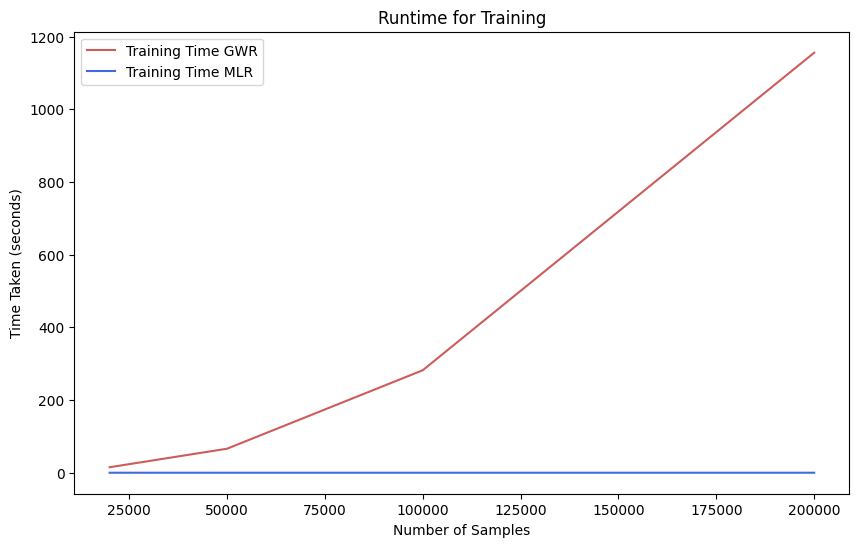

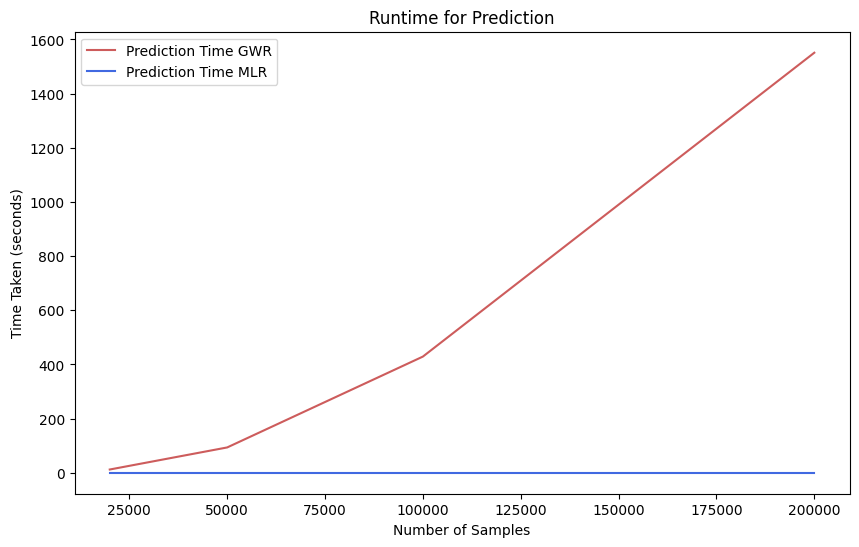

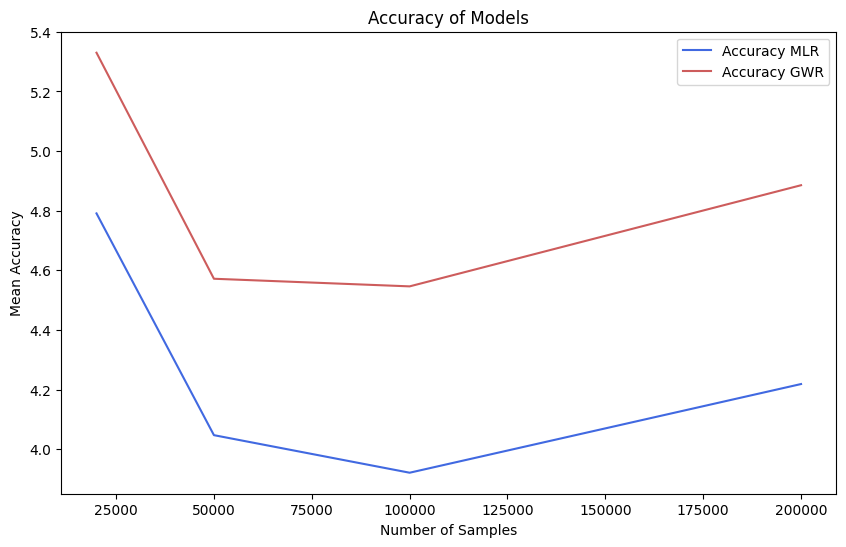

In [49]:

import pandas as pd
from matplotlib import pyplot as plt

# Create DataFrames for each model
gwr_data = {
    'Number of Samples': test_samples,
    'Training time (GWR)': training_speed_gwr,
    'Prediction time (GWR)': prediction_speed_gwr,
    'Accuracy (GWR)': accuracy_gwr
}
df_gwr = pd.DataFrame(gwr_data)

linear_regression_data = {
    'Number of Samples': test_samples,
    'Training time (MLR)': training_speed_lr,
    'Prediction time (MLR)': prediction_speed_lr,
    'Accuracy (MLR)': accuracy_lr
}
df_linear_regression = pd.DataFrame(linear_regression_data)

#plot runtime for training
plt.figure(figsize=(10, 6))
plt.plot(df_gwr['Number of Samples'], df_gwr['Training time (GWR)'], color='indianred', label='Training Time GWR')
plt.plot(df_linear_regression['Number of Samples'], df_linear_regression['Training time (MLR)'], color='royalblue', label='Training Time MLR')
plt.xlabel('Number of Samples')
plt.ylabel('Time Taken (seconds)')
plt.title('Runtime for Training')
plt.legend()
plt.grid(False)
plt.show()

# Plotting runtime for prediction of the two models
plt.figure(figsize=(10, 6))
plt.plot(df_gwr['Number of Samples'], df_gwr['Prediction time (GWR)'], color='indianred', label='Prediction Time GWR')
plt.plot(df_linear_regression['Number of Samples'], df_linear_regression['Prediction time (MLR)'], color='royalblue', label='Prediction Time MLR')
plt.xlabel('Number of Samples')
plt.ylabel('Time Taken (seconds)')
plt.title('Runtime for Prediction')
plt.legend()
plt.grid(False)
plt.show()

# Plotting accuracy of the two models
plt.figure(figsize=(10, 6))
plt.plot(df_linear_regression['Number of Samples'], df_linear_regression['Accuracy (MLR)'], color='royalblue', label='Accuracy MLR')
plt.plot(df_gwr['Number of Samples'], df_gwr['Accuracy (GWR)'], color='indianred', label='Accuracy GWR')
plt.xlabel('Number of Samples')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy of Models')
plt.legend()
plt.grid(False)
plt.show()
